In [2]:
import cv2
import numpy as np

img1 = cv2.imread('../project_2/images/lion.jpg')
img = cv2.imread('../project_2/images/lion.jpg',0)
ret,thresh = cv2.threshold(img,191,255,0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img1 = cv2.drawContours(img1,[contours[2382]], 0, (255,0,0), 3)

img1 = cv2.drawContours(img1,[contours[3218]], 0, (0,255,0), 3)
img1 = cv2.drawContours(img1,[contours[3221]], 0, (0,255,0), 3)
img1 = cv2.drawContours(img1,[contours[3222]], 0, (0,255,0), 3)
img1 = cv2.drawContours(img1,[contours[3223]], 0, (0,255,0), 3)

cv2.imwrite('images/image.jpg', img1)


area = cv2.contourArea(contours[2382])

per = cv2.arcLength(contours[2382], False)

print(area, per)

7514.5 454.49747383594513


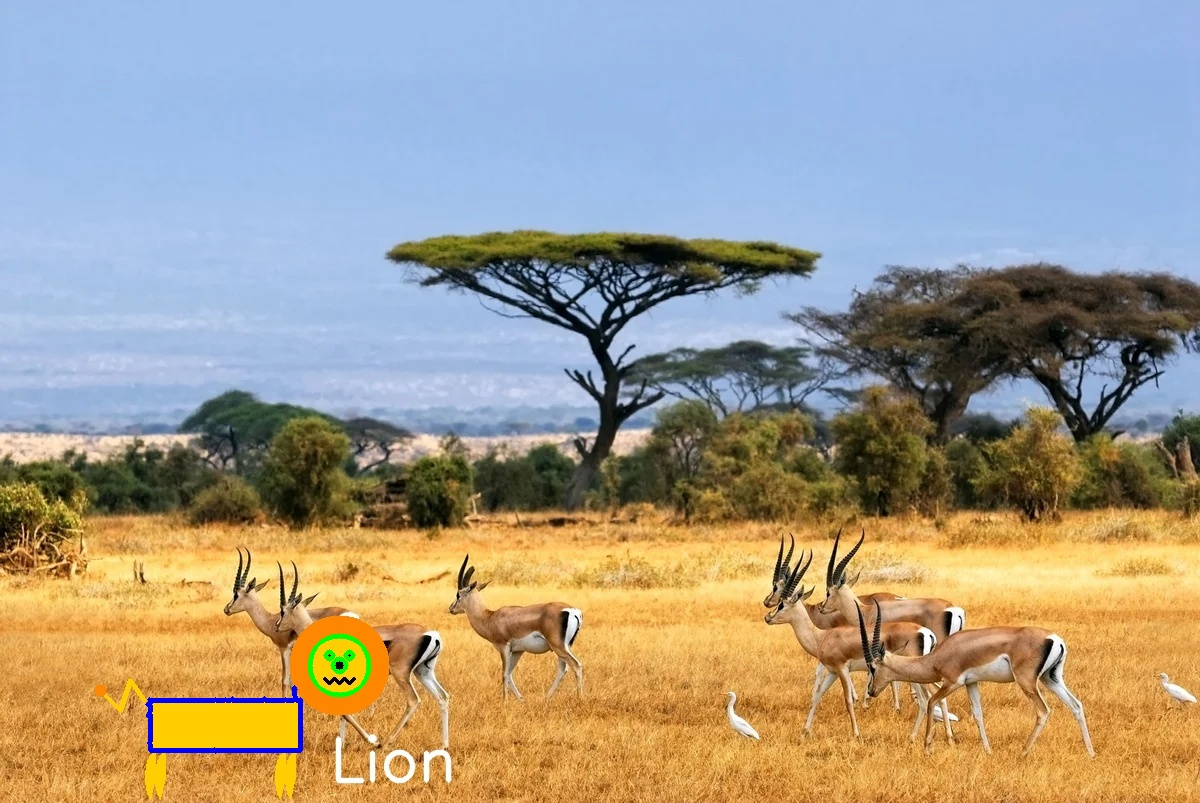

In [32]:
# Программа выводит прямоугольник наименьшей площади, круг и эллипс для каждой фигуры
import numpy as np
import cv2 as cv

hsv_min = np.array((0, 54, 5), np.uint8)
hsv_max = np.array((187, 255, 253), np.uint8)

img = cv.imread('images/image2.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
thresh = cv.inRange(hsv, hsv_min, hsv_max)
image, contours0, hierarchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# перебираем все найденные контуры в цикле
for cnt in contours0:
    rect = cv.minAreaRect(cnt)
    (x, y), radius = cv.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    box = cv.boxPoints(rect)  
    box = np.int0(box)  
    area = int(cv.contourArea(cnt))  # вычисление площади
    if area > 300:
        rows,cols = img.shape[:2]
        [vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
        lefty = int((-x*vy/vx) + y)
        righty = int(((cols-x)*vy/vx)+y)
        cv.line(img,(cols-1,righty),(0,lefty),(255,255,0),2)
        cv.drawContours(img, [box], 0, (255, 0, 0), 2)
        ellipse = cv.fitEllipse(cnt)
        cv.ellipse(img, ellipse, (102, 255, 0), 2)
        cv.circle(img, center, radius, (0, 255, 255), 2)
        hull = cv.convexHull(cnt, returnPoints=False)
        defects = cv.convexityDefects(cnt, hull)
        for i in range(defects.shape[0]):
            s, e, f, d = defects[i, 0]
            start = tuple(cnt[s][0])
            end = tuple(cnt[e][0])
            far = tuple(cnt[f][0])
            cv2.line(img, start, end, [0, 255, 0], 2)
            cv2.circle(img, far, 5, [255, 0, 0], -1)
        

cv.imwrite('images/image3.jpg', img)

True

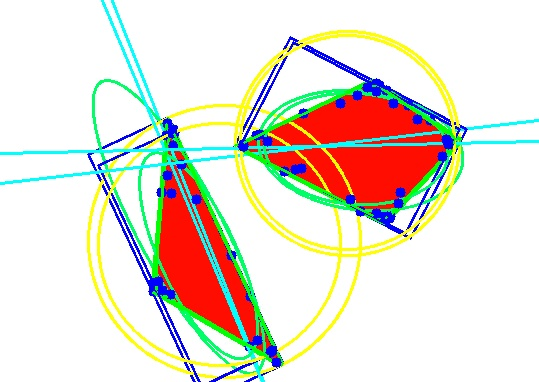

In [27]:
# Программа ищет наибольший по площади контур, описывающий
# только внутренности вагона на изображении railway_carriage.jpg
img = cv2.imread('images/railway_carriage.jpg')
gray = cv2.imread('images/railway_carriage.jpg', 0)
ret, gray = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
image,contours0, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

maxArea = 0
for cnt in contours0:
    area = cv2.contourArea(cnt)
    if area > maxArea:
        maxArea = area

for cnt in contours0:
    area = cv2.contourArea(cnt)
    if area == maxArea:
        cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)


cv2.imwrite('images/image4.jpg', img)

True

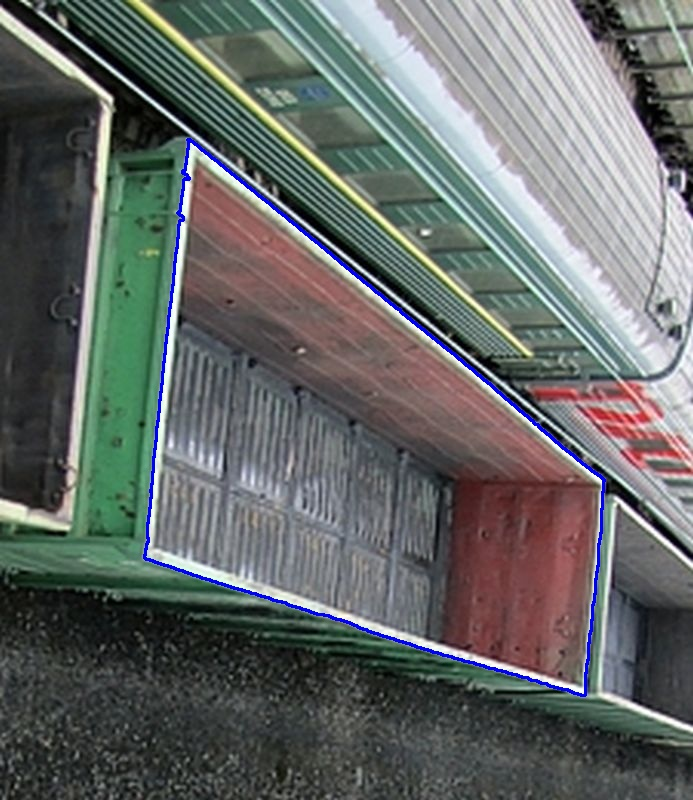